## 4.1: Using data science packages in Jupyter notebooks.

In [1]:
# Import packages

## Most coding styles require package imports at the top of the notebook.
## This style prevents running much of a notebook to find a package needs to be installed.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 22.3 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 37.3 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
# Use pandas to load the hawks dataset
hawks = pd.read_csv('hawks.csv')
hawks.head()

NameError: name 'pd' is not defined

This dataset includes data about hawks at a nature preserve in Iowa.
 * Species - CH:Cooper's Hawk, SS:Sharp-shinned Hawk, RT:Redtail Hawk
 * Age - A:Adult, I:Immature
 * Wing - length of the primary wing feather in mm
 * Weight - Body weight in g
 * Culmen - Length along the top of the bill from tip to face in mm
 * Hallux - Length in mm of the killing talon
 * Tail - Aggregate measurement related to the length of the tail in mm

In [4]:
# Calculate summary statistics using dataframe.describe() from pandas
hawks.describe(include='all')

,Species,Age,Wing,Weight,Culmen,Hallux,Tail
count,891,891,891.000000,891.000000,891.000000,891.000000,891.000000
unique,3,2,NaN,NaN,NaN,NaN,NaN
top,RT,I,NaN,NaN,NaN,NaN,NaN
freq,567,672,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,315.947475,771.615039,21.808923,26.413244,198.893378
std,NaN,NaN,95.316699,462.936901,7.293190,17.825541,36.826634
min,NaN,NaN,37.200000,56.000000,8.600000,9.500000,119.000000
25%,NaN,NaN,202.000000,185.000000,12.800000,15.100000,160.000000
50%,NaN,NaN,370.000000,970.000000,25.500000,29.400000,214.000000
75%,NaN,NaN,390.000000,1120.000000,27.350000,31.400000,225.000000


<Axes: xlabel='Wing', ylabel='Weight'>

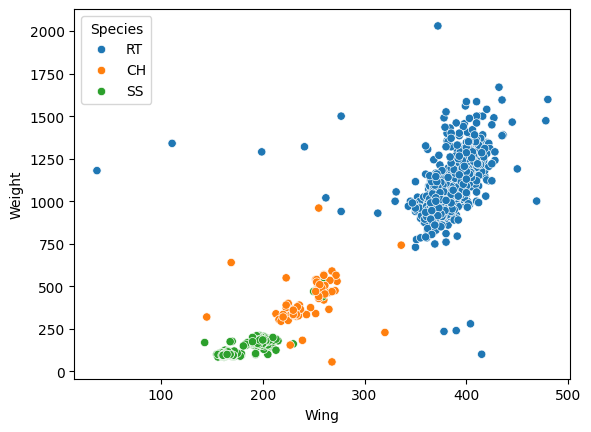

In [5]:
# Visualize the relationship between wing span and weight using seaborn
sns.scatterplot(data=hawks, x='Wing', y='Weight', hue='Species')

In [6]:
# Calculate the mean for each feature according to each species.

## pandas makes calculating statistics of groups easy with the groupby function.
hawks.groupby('Species').mean(numeric_only=True)



,Wing,Weight,Culmen,Hallux,Tail
Species,,,,,
CH,244.144928,419.623188,17.563768,22.684058,200.956522
RT,383.629982,1094.841270,26.974956,32.014198,222.125220
SS,184.882353,148.156863,11.470784,14.968431,146.678431


In [7]:
# Predict weight based on wing length
X = hawks[['Wing']]
y = hawks[['Weight']]

# Create a training/testing split using scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [8]:
# Use a linear regression model from scikit-learn
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)  # Fit the model on the training set

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
# Make predictions for the test set using scikit-learn
y_pred = linearModel.predict(X_test)
y_pred[:5]

array([[1144.68590644],
       [1121.45661033],
       [1009.95598899],
       [ 271.26437266],
       [  34.32555233]])